# Gender Equality in the Japanese Workplace

This is a study into the gender equality or therefore lack of in the Japanese workplace.

The data collected for this study was obtained via surveying currently working Japanese women residing in Japan.


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [114]:
df = pd.read_csv('data/gender_equality_japanese_workplace_eng.csv', header=1)
total = len(df)

The default matplotlib bar chart is super ugly, so we'll create some custom styling.

In [164]:
import textwrap

def draw_barchart(x, y, x_ticks, y_ticks, title):
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    
    ax.spines["top"].set_visible(False) 
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_color('#1a1a1a')
    ax.spines['bottom'].set_color('#1a1a1a')
    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    
    ax.tick_params(axis='x', colors='#1a1a1a')
    ax.tick_params(axis='y', colors='#1a1a1a')
    
    plt.xticks(fontsize=14, color='#1a1a1a')  
    plt.yticks(y_ticks, fontsize=14, color='#1a1a1a') 
    plt.xticks(x, x_ticks)
    
    title = "\n".join(textwrap.wrap(title, 60))
    plt.title(title, fontsize=18, color='#1a1a1a', y=1.1)
    
    return ax.bar(x, y, width= 0.8, color="#ff5733", edgecolor = "none")

In [116]:
df.head()

,Age,My current job requires a degree or is skilled work.,There are more women in my workplace than men.,My boss is male.,The treatment between men and women in my workplace is not equal.,I feel disadvantaged because I am female.,There are things I have to do as a female that males do not.,As a female there are things I can not do that males can.,I would like to do a managerial job.,I will quit work when I marry/When I married I quit work.,My workplace offers maternity leave.,My workplace offers maternity leave to not just women but men too.,I feel that there is pressure for women to quit work once married.
0,40-49,disagree,disagree,disagree,disagree,agree,agree,disagree,agree,disagree,agree,agree,disagree
1,20-29,disagree,disagree,agree,disagree,disagree,agree,disagree,agree,disagree,agree,agree,disagree
2,20-29,disagree,agree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,agree,disagree,disagree
3,50~,agree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree
4,30-39,agree,disagree,agree,agree,agree,agree,disagree,agree,disagree,disagree,disagree,agree


In [117]:
df.describe()

,Age,My current job requires a degree or is skilled work.,There are more women in my workplace than men.,My boss is male.,The treatment between men and women in my workplace is not equal.,I feel disadvantaged because I am female.,There are things I have to do as a female that males do not.,As a female there are things I can not do that males can.,I would like to do a managerial job.,I will quit work when I marry/When I married I quit work.,My workplace offers maternity leave.,My workplace offers maternity leave to not just women but men too.,I feel that there is pressure for women to quit work once married.
count,51,51,51,51,51,51,51,51,51,51,51,51,51
unique,5,2,2,2,2,2,2,2,2,2,2,2,2
top,20-29,agree,disagree,agree,disagree,disagree,disagree,disagree,disagree,disagree,agree,agree,disagree
freq,19,28,26,31,35,38,28,40,32,45,44,27,32


The responses in the data are recorded as 'agree' or 'disagree'. This is binary by nature and would be more useful as a numerical value in order to quickly takes sums and averages of responses. As such, let's convert all the responses to their numerical equivalent.

As well as this the column labels are unreasonably long, so we will abreviate them too.

In [118]:
def response_convert(r):
    if r == 'agree':
        return 1
    elif r == 'disagree':
        return 0
    else:
        return r

df.columns = ['Age', 'Skilled', 'More Women', 'Male Boss', 'Unequal', 'Disadvantaged',
              'Female Tasks', 'Male Tasks', 'Managerial', 'Quit', 'Maternity',
              'Male Maternity', 'Pressure']

# Age is not binary so we need to remove it from the dataframe
# and then put it back after we have ran the conversion function.
age_col = df.pop('Age')
df = df.applymap(response_convert).astype(float)
df['Age'] = pd.Series(age_col, index=df.index)

df.head()

,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,20-29
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20-29
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50~
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39


## Equal Sample

Basic exploratory analysis on woman who responded that their workplace had gender equality.

Lets take a look at what percentages of respondants said that their workplace is equal.

We will also pull out the columns which strongly indicate inequality.

In [58]:
percentage = lambda x, y: x / y * 100

df_equal = df.loc[df['Unequal'] == 0, ['Female Tasks', 'Male Maternity', 'Pressure']]
total_equal = len(df_equal)

print('% Equal: {0}'.format(percentage(total_equal, total)))

df_equal.head()

% Equal: 68.62745098039215


,Female Tasks,Male Maternity,Pressure
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
5,1.0,1.0,1.0


Let's see what percentage of women who responded that their workplace is gender equal's workplaces are actually equal based off the columns we pulled out above.

In [65]:
equal = len(df_equal.loc[(df_equal['Female Tasks'] == 0) & 
       (df_equal['Male Maternity'] == 1) & 
       (df_equal['Pressure'] == 0)])

print("Entries: {0} | Equal: {1} | % True Equal: {2}".format(total_equal, equal, percentage(equal, total_equal)))

Entries: 35 | Equal: 11 | % True Equal: 31.428571428571427


We can actually see that only 31% of women who responded that their workplace is gender equal's workplaces are equal based off the columns we pulled out above.

Let's go a bit more visual and graph the total amount of women that responded that their workplace is gender equal next to the total amount of women in the same 'equal' sample responded that they have to do tasks that men don't have to do because they are a female and who feel a pressure to quit work after marriage.

<Container object of 3 artists>

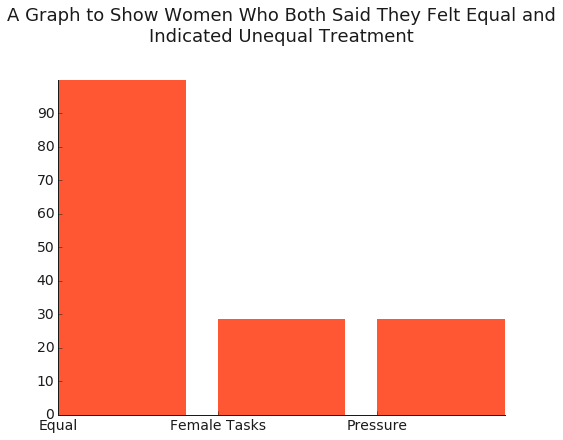

In [165]:
equal_tasks_percentage = percentage(df_equal['Female Tasks'].sum(), total_equal)
equal_pressure_percentage = percentage(df_equal['Pressure'].sum(), total_equal)

y = [100, equal_tasks_percentage, equal_pressure_percentage]
x = [0, 1, 2]
x_ticks = ['Equal', 'Female Tasks', 'Pressure']
y_ticks = range(0, 100, 10)
title = 'A Graph to Show Women Who Both Said They Felt Equal and Indicated Unequal Treatment'

draw_barchart(x, y, x_ticks, y_ticks, title)

As we can see a lot of women who belive they are being treated equally also feel pressure to quit work after marriage. A fair few also have to do tasks that men don't because they are female.

## Unequal Sample
Basic exploratory analysis on woman who responded that their workplace had gender equality.

Let's see what percentage of the respondants feel that they are treated unequally.

In [31]:
df_unequal = df.loc[df['Unequal'] == 1, ['Female Tasks', 'Male Maternity', 'Pressure']]
total_unequal = len(df_unequal)

print('% Unequal: {0}'.format(percentage(total_unequal, total)))

df_unequal.head()

% Unequal: 31.372549019607842


,Female Tasks,Male Maternity,Pressure
4,1.0,0.0,1.0
8,1.0,0.0,1.0
9,1.0,1.0,1.0
10,1.0,0.0,1.0
11,1.0,0.0,0.0


It might be interesting to see what percentage of women who think they are being treated unequally answered agree to 'Female tasks', disagree to 'Male Maternity' and agree to 'Pressure'

In [80]:
female_tasks = percentage(df_unequal['Female Tasks'].value_counts()[1], total_unequal)
male_maternity = percentage(df_unequal['Male Maternity'].value_counts()[0], total_unequal)
unequal_pressure = percentage(df_unequal['Pressure'].value_counts()[1], total_unequal)
print("Female Tasks: {0} | Male Maternity: {1} | Pressure {2}".format(female_tasks, male_maternity, unequal_pressure))

Female Tasks: 81.25 | Male Maternity: 56.25 | Pressure 56.25


81%, a huge amount of them have to do things that males to do. Male maternity leave is not offered more than is offered and over half of them feel pressured to quit work after marriage. These factors definitely contribute to the feeling of gender inequality.

Being made to do things that men don't have to do is definitely the big one here, as can be seen if we graph them.

<Container object of 3 artists>

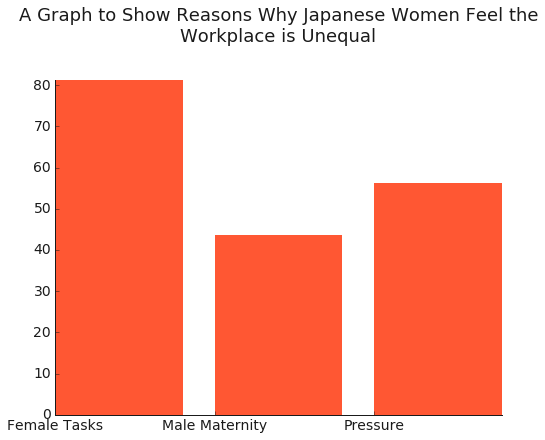

In [166]:
unequal_tasks_percentage = percentage(df_unequal['Female Tasks'].sum(), total_unequal)
unequal_malemat_percentage = percentage(df_unequal['Male Maternity'].sum(), total_unequal)
unequal_pressure_percentage = percentage(df_unequal['Pressure'].sum(), total_unequal)

y = [unequal_tasks_percentage, unequal_malemat_percentage, unequal_pressure_percentage]
x=[0, 1, 2]
x_ticks = df_unequal.columns.values
y_ticks = range(0, 100, 10)
title = 'A Graph to Show Reasons Why Japanese Women Feel the Workplace is Unequal'

draw_barchart(x, y, x_ticks, y_ticks, title)

## Skilled Sample
Basic exploratory analysis on woman who responded that their job requires a degree or is skilled work.

As we can see below, over half of the respondants were in jobs which require a degree or is skilled work. This is less than I expected seems as Japan one of the countries with the highest levels of education amongst women.

In [34]:
skilled = df.loc[df['Skilled'] == 1]
total_skilled = len(skilled)

print('% Skilled: {0}'.format(percentage(total_skilled, total)))

skilled.head()

% Skilled: 54.90196078431373


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50~
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
14,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,50~


If we take a look at what percentage of unskilled women also think that there is gender inequality in their workplace, we can see that a quarter of respondants beleive this. It would be interesting to compare this to UK or USA.

In [35]:
skilled_unequal = df.loc[(df['Skilled'] == 1) & (df['Unequal'] == 1)]
total_skilled_unequal = len(skilled_unequal)

print('% Skilled, Unequal: {0}'.format(percentage(total_skilled_unequal, total_skilled)))

skilled_unequal.head()

% Skilled, Unequal: 25.0


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
14,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,50~
16,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,30-39
20,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20-29


And if we look at how many feel pressure to quit work after marriage, more of them actually agree with this than their workplace is unequal. Again, this doesn't match up.

In [36]:
skilled_pressure = df.loc[(df['Skilled'] == 1) & (df['Pressure'] == 1)]
total_skilled_pressure = len(skilled_pressure)

print('% Skilled, Pressure: {0}'.format(percentage(total_skilled_pressure, total_skilled)))

skilled_pressure.head()

% Skilled, Pressure: 32.142857142857146


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
17,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
26,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,50~


When we look at how many skilled women feel disadvantaged because of the fact they are a women, compared to other answers a relatively small percentage comes out.

In [37]:
skilled_disadv = df.loc[(df['Skilled'] == 1) & (df['Disadvantaged'] == 1)]
total_skilled_disadv = len(skilled_disadv)

print('% Skilled, Disadvantaged: {0}'.format(percentage(total_skilled_disadv, total_skilled)))

skilled_disadv.head()

% Skilled, Disadvantaged: 10.714285714285714


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40-49
40,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,50~


## Unskilled sample
Basic exploratory analysis on woman who responded that their job does not require a degree and is not skilled work.

In [38]:
unskilled = df.loc[df['Skilled'] == 0]
total_unskilled = len(unskilled)

print('% Unskilled: {0}'.format(percentage(total_unskilled, total)))

unskilled.head()

% Unskilled: 45.09803921568628


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,20-29
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20-29
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20-29
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20-29


Almost 15% more of this group of women feel that their workplace has gender inequality than women in jobs requireing a degree or that is skilled work. Does this mean that in workplaces that require degrees and skilled work there is less of a gender gap?

In [39]:
unskilled_unequal = df.loc[(df['Skilled'] == 0) & (df['Unequal'] == 1)]
total_unskilled_unequal = len(unskilled_unequal)

print('% Unskilled, Equal: {0}'.format(percentage(total_unskilled_unequal, total_unskilled)))

unskilled_unequal.head()

% Unskilled, Equal: 39.130434782608695


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
9,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,20-29
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
11,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,20-29
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
27,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50~


Almost half of women who work unskilled work feel a pressure to quit after marriage which is shockingly high.

In [40]:
unskilled_pressure = df.loc[(df['Skilled'] == 0) & (df['Pressure'] == 1)]
total_unskilled_pressure = len(unskilled_pressure)

print('% Unskilled, Pressure: {0}'.format(percentage(total_unskilled_pressure, total_unskilled)))

unskilled_pressure.head()

% Unskilled, Pressure: 43.47826086956522


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20-29
9,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,20-29
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
13,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,20-29


And again a high percentage of unskilled women workers feel the fact that they are a woman puts them at a disadvantage.

In [41]:
unskilled_disadv = df.loc[(df['Skilled'] == 0) & (df['Disadvantaged'] == 1)]
total_unskilled_disadv = len(unskilled_disadv)

print('% Unskilled, Disadvantaged: {0}'.format(percentage(total_unskilled_disadv, total_unskilled)))

unskilled_disadv.head()

% Unskilled, Disadvantaged: 43.47826086956522


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
15,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,20-29
18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40-49


The percentage of skilled women that feel that there is unequal treatment vs unskilled women that feel that there is unequal treatment.

<Container object of 2 artists>

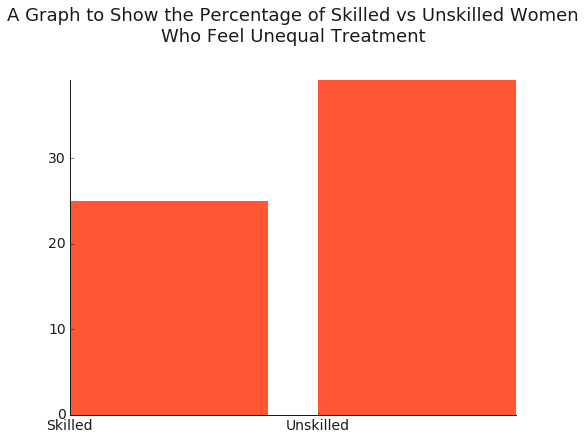

In [167]:
percentage_skilled_unequal = percentage(total_skilled_unequal, total_skilled)
percentage_unskilled_unequal = percentage(total_unskilled_unequal, total_unskilled)

y = [percentage_skilled_unequal, percentage_unskilled_unequal]
x = [0, 1]
x_ticks = ['Skilled', 'Unskilled']
y_ticks = range(0, 100, 10)
title = 'A Graph to Show the Percentage of Skilled vs Unskilled Women Who Feel Unequal Treatment'

draw_barchart(x, y, x_ticks, y_ticks, title)

## Want to go into management sample
Basic exploratory analysis on woman who responded that they would like to do a managerial role.

In [70]:
managerial = df[df['Managerial'] == 1]
total_managerial = len(managerial)

print('% Managerial: {0}'.format(percentage(total_managerial, total)))

df.head()

% Managerial: 37.254901960784316


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,20-29
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20-29
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50~
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39


37% of women who responded would like to do a managerial job, but if we compare that to respondants who either had a female boss or were the female boss there is a gap. However there is less of a gap in this sample than I would have imagined.

<Container object of 2 artists>

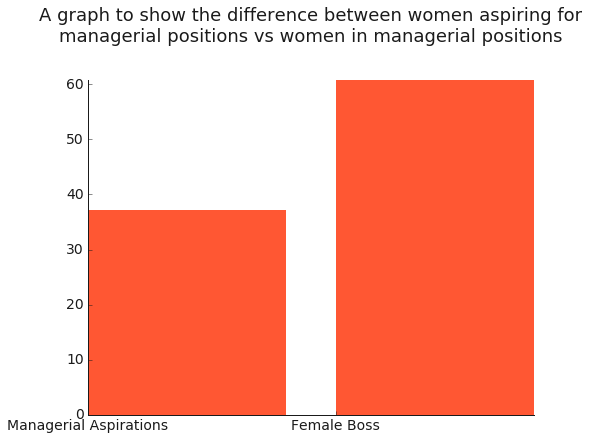

In [168]:
female_boss = df[df['Male Boss'] == 0]
total_female_boss = len(male_boss)

y = [percentage(total_managerial, total), percentage(total_female_boss, total)]
x = [0, 1]
x_ticks = ['Managerial Aspirations', 'Female Boss']
y_ticks = range(0, 100, 10)
title = 'A graph to show the difference between women aspiring for managerial positions vs women in managerial positions'

draw_barchart(x, y, x_ticks, y_ticks, title)

## Want to quit work after marriage sample

In this dataset only around 12% of women who responded said that they want to (or did) quit after marriage, which is less than I expected.

In [77]:
quit = df[df['Quit'] == 1]
total_quit = len(quit)

print('% Quit after marriage: {0}'.format(percentage(total_quit, total)))

% Quit after marriage: 11.76470588235294


Although this amount is less than I expected, if we compare this to the percentage of women who feel pressured to quit it shows a scary reality that although women are being pressured to quit, they really don't want to.

<Container object of 2 artists>

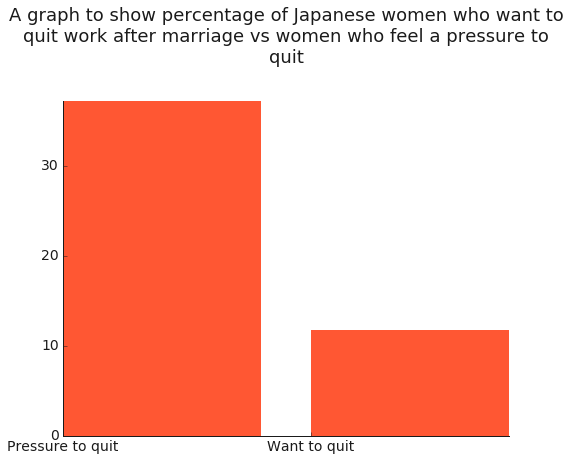

In [170]:
pressure = df[df['Pressure'] == 1]
total_pressure = len(pressure)

y = [percentage(total_pressure, total), percentage(total_quit, total)]
x = [0, 1]
x_ticks = ['Pressure to quit', 'Want to quit']
y_ticks = range(0, 100, 10)
title = 'A graph to show percentage of Japanese women who want to quit work after marriage vs women who feel a pressure to quit'

draw_barchart(x, y, x_ticks, y_ticks, title)